-------Area:  12300.0
-------Perimetro:  464.0


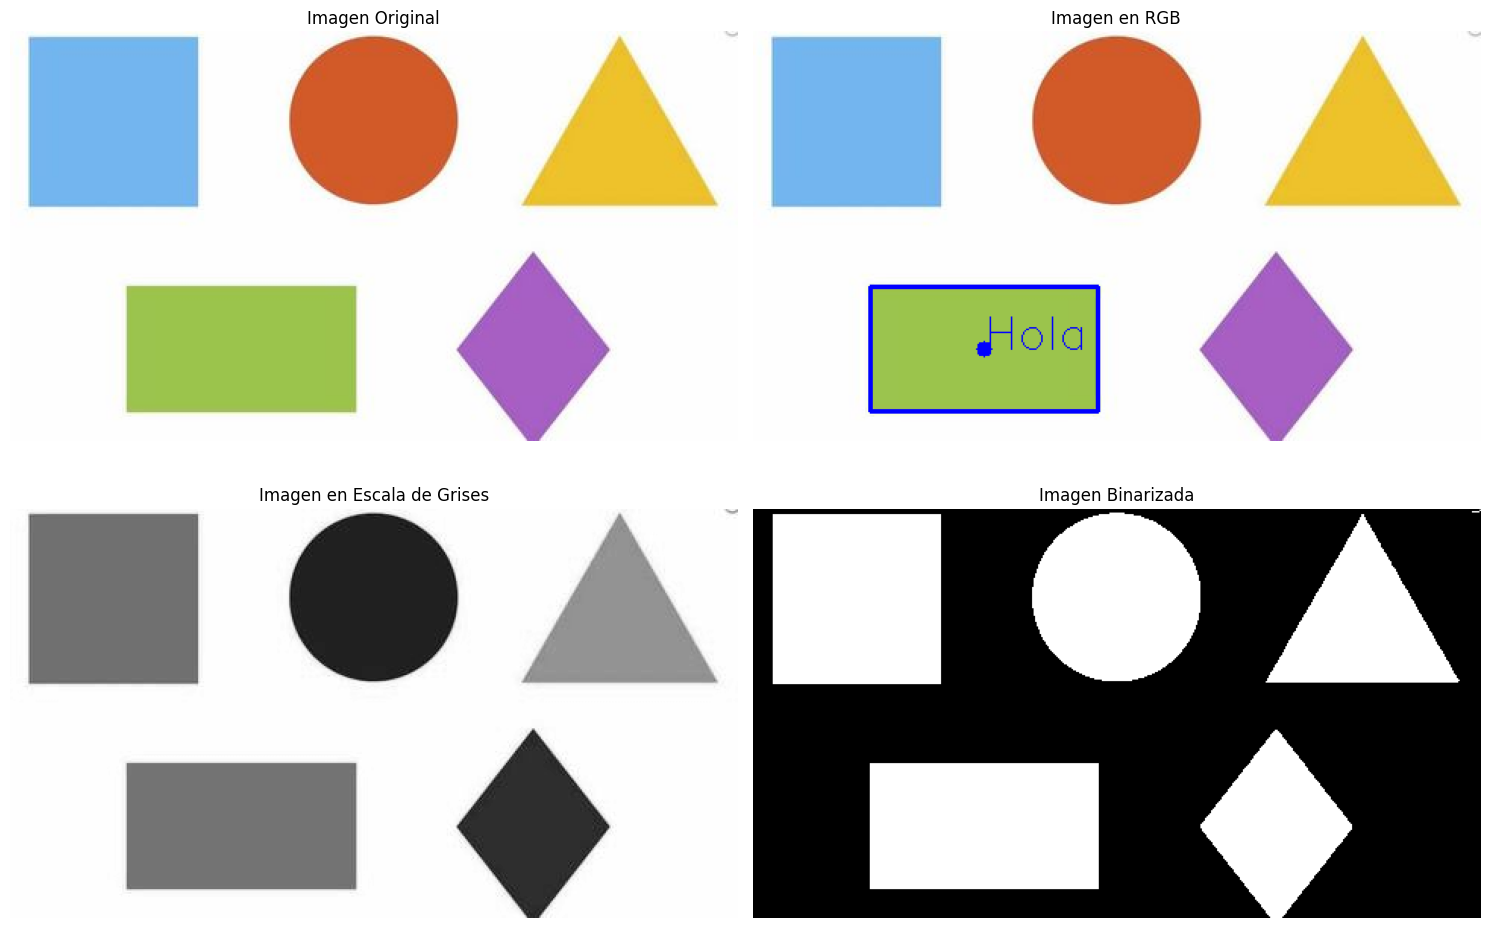

In [23]:

import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('Obketos.jpg')

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

ret, umbral = cv2.threshold(gris, 200, 255, cv2.THRESH_BINARY_INV)

contornos, Tipo = cv2.findContours(umbral, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

contar = contornos[0]

momento = cv2.moments(contar)
cX = int(momento["m10"]/momento["m00"]) #Centroide
cY = int(momento["m01"]/momento["m00"])

area = cv2.contourArea(contar)
print("-------Area: ", area)

area = cv2.contourArea(contar)

perimetro = cv2.arcLength(contar, True)

print("-------Perimetro: ", perimetro)
cv2.circle(img_rgb, (cX, cY), 5, (0, 0, 255), -1)



cv2.drawContours(img_rgb, [contar], -1, (0, 0, 255), 2)
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
plt.title('Imagen Original')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.subplot(2, 2, 2)
plt.title('Imagen en RGB')
plt.imshow(img_rgb)
plt.axis('off')
plt.subplot(2, 2, 3)
plt.title('Imagen en Escala de Grises')
plt.imshow(gris, cmap='gray')
plt.axis('off')
plt.subplot(2, 2, 4)
plt.title('Imagen Binarizada')
plt.imshow(umbral, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

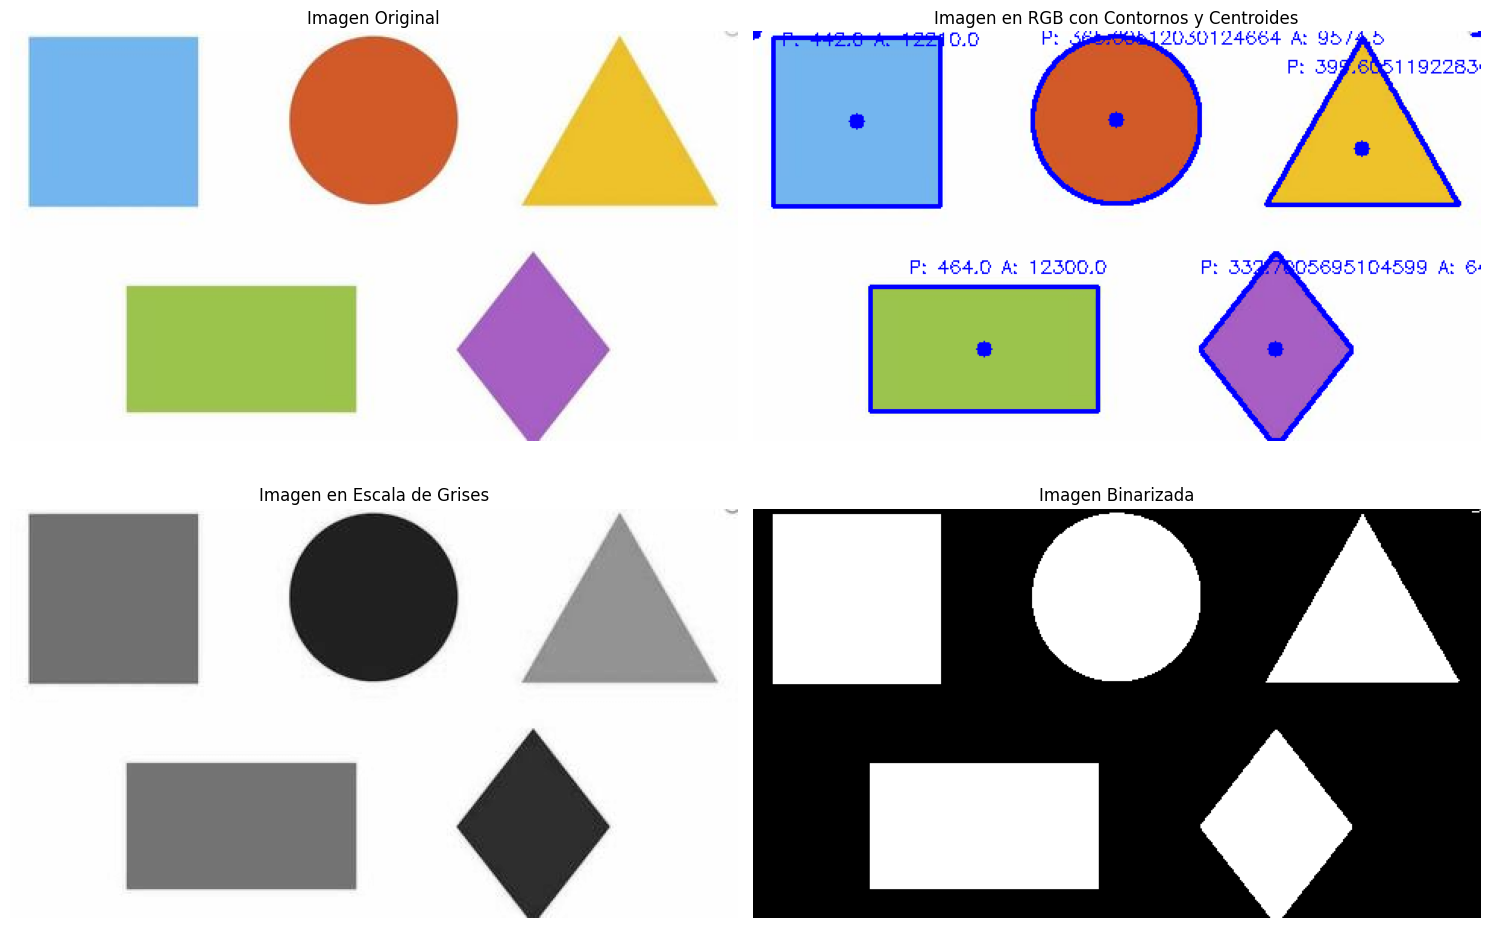

In [38]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('Obketos.jpg')

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

ret, umbral = cv2.threshold(gris, 200, 255, cv2.THRESH_BINARY_INV)

contornos, jerarquia = cv2.findContours(umbral, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

img_contornos = img_rgb.copy()

for i, contar in enumerate(contornos):
    momento = cv2.moments(contar)
    if momento["m00"] != 0:
        cX = int(momento["m10"] / momento["m00"]) 
        cY = int(momento["m01"] / momento["m00"])  
    else:
        cX, cY = 0, 0

    area = cv2.contourArea(contar)

    perimetro = cv2.arcLength(contar, True)

    cadena = f"P: {perimetro} A: {area}"

    cv2.putText(img_contornos, cadena, (cX- 50, cY- 50), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (0,0,255,1))

    cv2.circle(img_contornos, (cX, cY), 5, (0, 0, 255), -1)

    cv2.drawContours(img_contornos, [contar], -1, (0, 0, 255), 2)

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.title('Imagen Original')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title('Imagen en RGB con Contornos y Centroides')
plt.imshow(img_contornos)
plt.axis('off')

plt.subplot(2, 2, 3)
plt.title('Imagen en Escala de Grises')
plt.imshow(gris, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.title('Imagen Binarizada')
plt.imshow(umbral, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()
